In [30]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# вероятность достать носок конкретного цвета:
# 16 + 14 + 3 = 33
p_red = 16/33
p_blue = 14/33
p_black = 3/33

# n - искомое число попыток
n = 2  # для инициирования возьём n = 2, т.к. всё равно меньше попыток делать не будем - нужно достать два носка одного цвета

"""
В текущей задаче случайная величина дискретная с двумя исходами: достали носок нужного цвета или не достали.
При этом мы делаем несколько попыток достать носки одного цвета, следовательно у нас идёт серия независимых попыток, 
каждая их которых - случайная величина с двумя исходами (бинарная случайная величина). 
В таком случае для моделирования можно воспользоваться биномиальной случайной величиной. X ~ Bin(n,p).
"""

def P(n, P):
    """
    Функция возвращает вероятность вытянуть из стиральной машинки 2 носка одного цвета за n попыток
    :param n: количество попыток
    :param p: вероятность вынуть носок конкретного цвета за одну попытку
    """
    C = math.factorial(n)/(math.factorial(n-2)*math.factorial(2))
    p = P**2
    q = (1 - P)**(n-2)
    
    return C*p*q

In [21]:
# вероятности достать два носка одного цвета для каждой попытки из серии (от 2 до 32 попыток)
P_red_series = []
P_blue_series = []
P_black_series = []

for n in range(2, 33):
    P_red_series.append(round(P(n, p_red)*100, 4))
P_red_series = np.array(P_red_series)

for n in range(2, 33):
    P_blue_series.append(round(P(n, p_blue)*100, 4))
P_blue_series = np.array(P_blue_series)

for n in range(2, 33):
    P_black_series.append(round(P(n, p_black)*100, 4))
P_black_series = np.array(P_black_series)

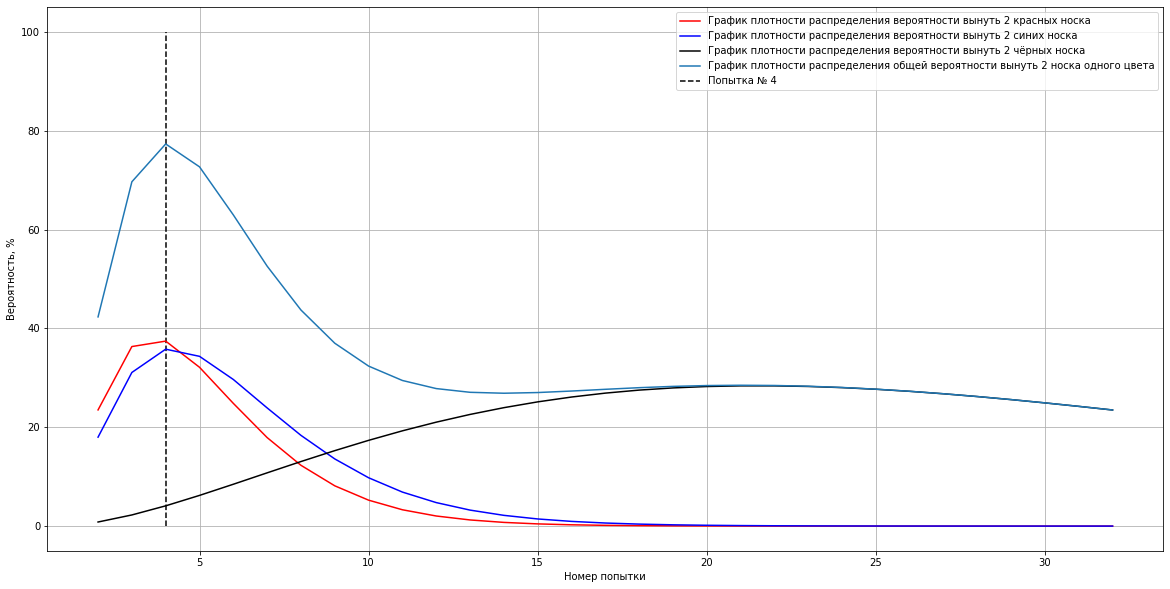

In [63]:
attempts = np.arange(2, 33, 1)  # номера попыток от 2 до 32 с шагом 1
cumulative_probability = P_black_series + P_blue_series + P_red_series
num_of_Pmax = np.argmax(cumulative_probability)
val_of_Pmax = cumulative_probability[num_of_Pmax - 1]
fig = plt.figure(figsize=(20,10))
plt.plot(attempts, P_red_series, label='График плотности распределения вероятности вынуть 2 красных носка', color='red')
plt.plot(attempts, P_blue_series, label='График плотности распределения вероятности вынуть 2 синих носка', color='blue')
plt.plot(attempts, P_black_series, label='График плотности распределения вероятности вынуть 2 чёрных носка', color='black')
plt.plot(attempts, cumulative_probability, label='График плотности распределения общей вероятности вынуть 2 носка одного цвета')
plt.vlines(attempts[num_of_Pmax], 0, 100, label=f'Попытка № {attempts[num_of_Pmax]}', linestyles='dashed')

plt.ylabel('Вероятность, %')
plt.xlabel('Номер попытки')
plt.legend()
plt.grid()
plt.show();

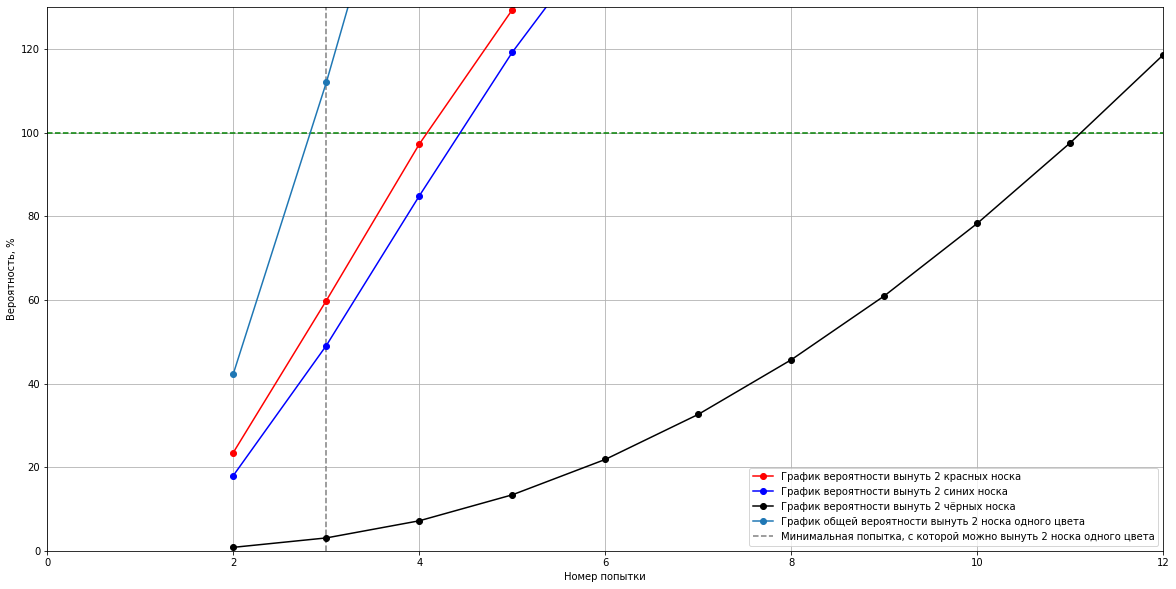

In [62]:
attempts = np.arange(2, 33, 1)  # номера попыток от 2 до 32 с шагом 1
cumulative_probability = P_black_series + P_blue_series + P_red_series

sum_cum_prob = []
for i in range(1, len(cumulative_probability)+1):
    sum_cum_prob.append(sum(cumulative_probability[:i]))
    
red_cum_prob = []
for i in range(1, len(P_red_series)+1):
    red_cum_prob.append(sum(P_red_series[:i]))
    
blue_cum_prob = []
for i in range(1, len(P_blue_series)+1):
    blue_cum_prob.append(sum(P_blue_series[:i]))
    
black_cum_prob = []
for i in range(1, len(P_black_series)+1):
    black_cum_prob.append(sum(P_black_series[:i]))
    
fig = plt.figure(figsize=(20,10))
plt.plot(attempts, red_cum_prob, label='График вероятности вынуть 2 красных носка', color='red', marker='o')
plt.plot(attempts, blue_cum_prob, label='График вероятности вынуть 2 синих носка', color='blue', marker='o')
plt.plot(attempts, black_cum_prob, label='График вероятности вынуть 2 чёрных носка', color='black', marker='o')
plt.plot(attempts, sum_cum_prob, label='График общей вероятности вынуть 2 носка одного цвета', marker='o')
plt.hlines(100,0,15,linestyles='dashed', color='green')
plt.vlines(3, 0, 130, label=f'Минимальная попытка, с которой можно вынуть 2 носка одного цвета', linestyles='dashed', color='grey')
plt.scatter(3,sum_cum_prob[2])

plt.ylim((0,130))
plt.xlim((0,12))
plt.ylabel('Вероятность, %')
plt.xlabel('Номер попытки')
plt.legend()
plt.grid()
plt.show();